In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
 # Load the dataset
Cars_df = pd.read_csv('NewCopy15cleanCarsCopy1df_filtered.csv')

In [4]:
# Define the new column names
rename_coll = {
        'Company Names': 'Make',
        'Cars Names': 'Model',
        'Cars Prices': 'Price',
        'Fuel Types': 'Fuel Type'
    }
Cars_df.rename(columns=rename_coll, inplace=True)
print(Cars_df.columns)

Index(['Make', 'Model', 'Engines', 'Capacity', 'HorsePower', 'Total Speed',
       'Performance', 'Price', 'Fuel Type', 'Seats', 'Torque'],
      dtype='object')


In [5]:
# Objective is to predict car price based on the Make, Model, Capacity, Fuel type and number of seats
# We are excluding 'Model' because its high number of unique values (high cardinality)
# makes it unsuitable for one-hot encoding in this context.
features = ['Make', 'Capacity', 'Fuel Type', 'Seats']
target = 'Price'

df_selected = Cars_df[features + [target]]

In [6]:
df_processed = pd.get_dummies(df_selected, columns=['Make', 'Fuel Type'], drop_first=True)


In [7]:
# Define our final feature set (X) and target (y)
X = df_processed.drop(target, axis=1)
y = df_processed[target]

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#print("\nTraining the SVR model...")
#svr_model = SVR(kernel='rbf', C=1000, gamma=0.1)
#svr_model.fit(X_train_scaled, y_train)
#print("Model training complete.")

print("\nStarting hyperparameter tuning with GridSearchCV...")
    
    # Define the parameter grid to search
param_grid = {'C': [100, 1000, 10000, 100000],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf']
    }

    # Create an SVR model instance
svr = SVR()

    # Create the GridSearchCV object
    # cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

    # Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
best_params = grid_search.best_params_
print(f"\nBest hyperparameters found: {best_params}")

    # The best model is automatically refit on the entire training data
best_svr_model = grid_search.best_estimator_


Starting hyperparameter tuning with GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters found: {'C': 100000, 'gamma': 0.01, 'kernel': 'rbf'}


In [11]:
# Make Predictions and Evaluate
y_pred = best_svr_model.predict(X_test_scaled)

In [12]:
# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n--- SVR Model Evaluation (after tuning) ---")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")


--- SVR Model Evaluation (after tuning) ---
R-squared (R2) Score: 0.20
Mean Absolute Error (MAE): $86,873.75
Mean Squared Error (MSE): $400,557,991,735.76



Generated plot: 'svr_price_prediction_final_tuned.png'


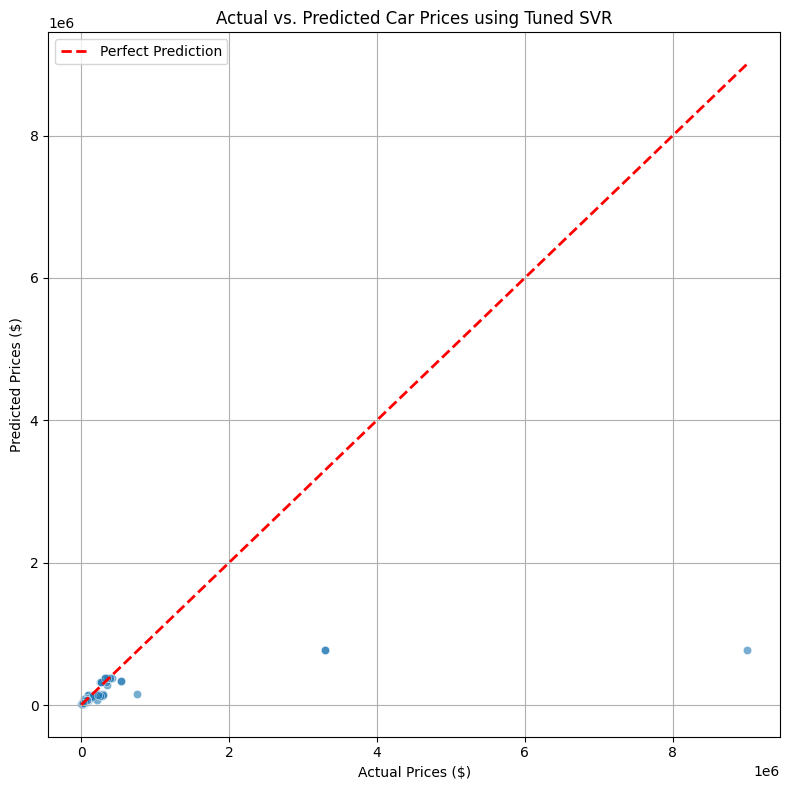

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
    # Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Actual vs. Predicted Car Prices using Tuned SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('svr_price_prediction_final_tuned.png')
print("\nGenerated plot: 'svr_price_prediction_final_tuned.png'")